# 导入必要的库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_cl

# 定义 beale 函数

In [2]:
def beale(x1, x2):
    return (
        (1.5 - x1 + x1 * x2) ** 2
        + (2.25 - x1 + x1 * x2**2) ** 2
        + (2.625 - x1 + x1 * x2**3) ** 2
    )


def dbeale_dx(x1, x2):
    dfdx1 = (
        2 * (1.5 - x1 + x1 * x2) * (x2 - 1)
        + 2 * (2.25 - x1 + x1 * x2**2) * (x2**2 - 1)
        + 2 * (2.625 - x1 + x1 * x2**3) * (x2**3 - 1)
    )
    dfdx2 = (
        2 * (1.5 - x1 + x1 * x2) * x1
        + 2 * (2.25 - x1 + x1 * x2**2) * (2 * x1 * x2)
        + 2 * (2.625 - x1 + x1 * x2**3) * (3 * x1 * x2**2)
    )
    return dfdx1, dfdx2

# SGD

In [3]:
def SGD(x_traj, lr):
    x1, x2 = x_traj[-1]
    dfdx1, dfdx2 = dbeale_dx(x1, x2)
    x1 -= lr * dfdx1
    x2 -= lr * dfdx2
    x_traj.append((x1, x2))
    return x_traj

# Momentum

In [4]:
def Momentum(x_traj, lr, momentum, v):
    x1, x2 = x_traj[-1]
    dfdx1, dfdx2 = dbeale_dx(x1, x2)
    v1, v2 = v
    v1 = momentum * v1 - lr * dfdx1
    v2 = momentum * v2 - lr * dfdx2
    x1 += v1
    x2 += v2
    x_traj.append((x1, x2))
    return x_traj, (v1, v2)

# AdaGrad

In [5]:
def AdaGrad(x_traj, lr, epsilon, G):
    x1, x2 = x_traj[-1]
    dfdx1, dfdx2 = dbeale_dx(x1, x2)
    g1, g2 = G
    g1 += dfdx1**2
    g2 += dfdx2**2
    G = (g1, g2)
    x1 -= lr * dfdx1 / (g1 ** (1 / 2) + epsilon)
    x2 -= lr * dfdx2 / (g2 ** (1 / 2) + epsilon)
    x_traj.append((x1, x2))
    return x_traj, (g1, g2)

# RMSProp

In [6]:
def RMSProp(x_traj, lr, momentum, epsilon, v):
    x1, x2 = x_traj[-1]
    dfdx1, dfdx2 = dbeale_dx(x1, x2)
    v1, v2 = v
    v1 = momentum * v1 + (1 - momentum) * dfdx1**2
    v2 = momentum * v2 + (1 - momentum) * dfdx2**2
    x1 -= lr * dfdx1 / (v1 ** (1 / 2) + epsilon)
    x2 -= lr * dfdx2 / (v2 ** (1 / 2) + epsilon)
    x_traj.append((x1, x2))
    return x_traj, (v1, v2)

# Adam

In [7]:
def Adam(x_traj, lr, beta1, beta2, epsilon, m, v):
    x1, x2 = x_traj[-1]
    dfdx1, dfdx2 = dbeale_dx(x1, x2)
    m1, m2 = m
    v1, v2 = v
    m1 = beta1 * m1 + (1 - beta1) * dfdx1
    m2 = beta1 * m2 + (1 - beta1) * dfdx2
    m1 /= 1 - beta1
    m2 /= 1 - beta1
    v1 = beta2 * v1 + (1 - beta2) * dfdx1**2
    v2 = beta2 * v2 + (1 - beta2) * dfdx2**2
    v1 /= 1 - beta2
    v2 /= 1 - beta2
    x1 -= lr * m1 / (v1 ** (1 / 2) + epsilon)
    x2 -= lr * m2 / (v2 ** (1 / 2) + epsilon)
    x_traj.append((x1, x2))
    return x_traj, m, v

# 绘制 beale 函数图像

In [8]:
step_x1, step_x2 = 0.2, 0.2
x1, x2 = np.meshgrid(
    np.arange(-5, 5 + step_x1, step_x1), np.arange(-5, 5 + step_x2, step_x2)
)
Y = beale(x1, x2)


def gd_plot(x_traj=None, optimizer_name=None):
    plt.figure()
    plt.rcParams["figure.figsize"] = [6, 6]
    plt.contour(
        x1, x2, Y, levels=np.logspace(0, 6, 30), norm=plt_cl.LogNorm(), cmap=plt.cm.jet
    )
    plt.title("2D Contour Plot of Beale Function ({})".format(optimizer_name))
    plt.xlabel("$X_1$")
    plt.ylabel("$x_2$")
    plt.axis("equal")
    plt.plot(3, 0.5, "k*", markersize=10)
    if x_traj is not None:
        x_traj = np.array(x_traj)
        plt.plot(x_traj[:, 0], x_traj[:, 1], "k-")

# 比较不同的优化器

(2.9999999999999303, 0.4999999999999827)


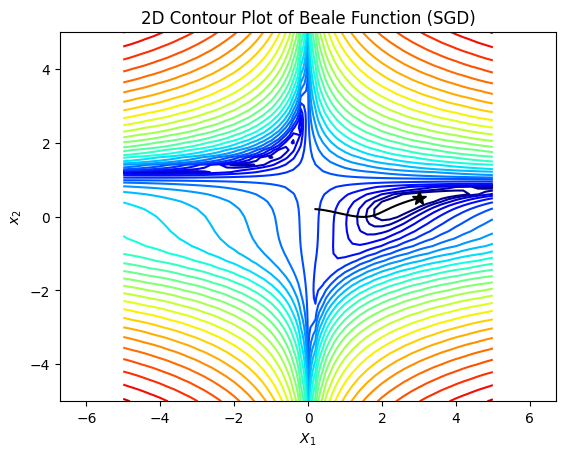

In [9]:
x_traj = [(step_x1, step_x2)]

for _ in range(10000):
    x_traj = SGD(x_traj=x_traj, lr=0.01)
print(x_traj[-1])
gd_plot(x_traj, "SGD")
plt.show()

(3.0, 0.4999999999999999)


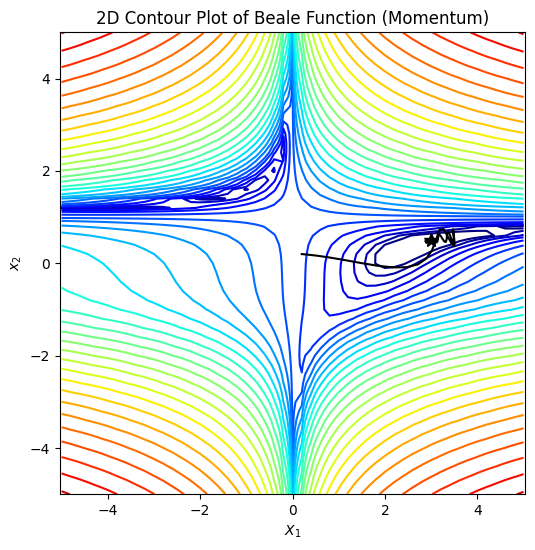

In [10]:
x_traj = [(step_x1, step_x2)]
v = (0, 0)

for _ in range(10000):
    x_traj, v = Momentum(x_traj=x_traj, lr=0.01, momentum=0.9, v=v)
print(x_traj[-1])
gd_plot(x_traj, "Momentum")
plt.show()

(2.999999999992447, 0.49999999999812655)


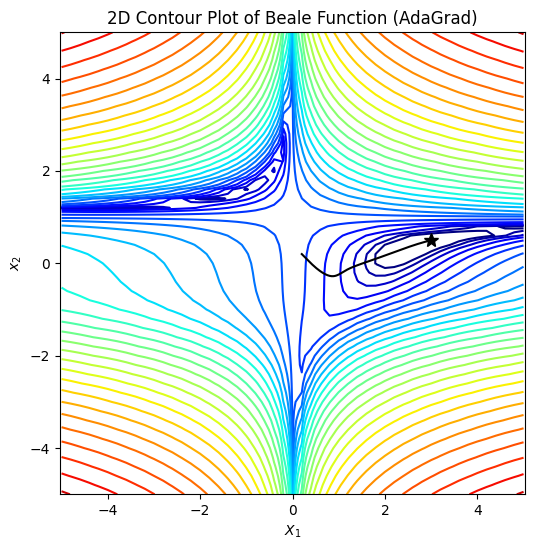

In [11]:
x_traj = [(step_x1, step_x2)]
G = (0, 0)

for _ in range(50000):
    x_traj, G = AdaGrad(x_traj=x_traj, lr=0.1, epsilon=1e-8, G=G)
print(x_traj[-1])
gd_plot(x_traj, "AdaGrad")
plt.show()

(3.0021591426128866, 0.49423788994883494)


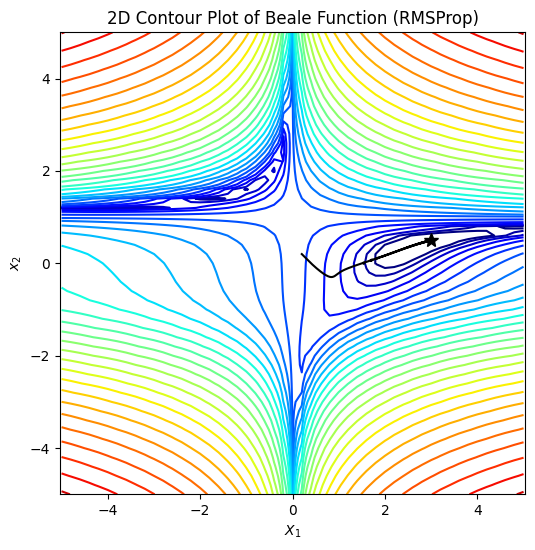

In [12]:
x_traj = [(step_x1, step_x2)]
v = (0, 0)

for _ in range(1000):
    x_traj, v = RMSProp(x_traj=x_traj, lr=0.01, momentum=0.9, epsilon=1e-8, v=v)
print(x_traj[-1])
gd_plot(x_traj, "RMSProp")
plt.show()

(2.9680086966586106, 0.4920241696314299)


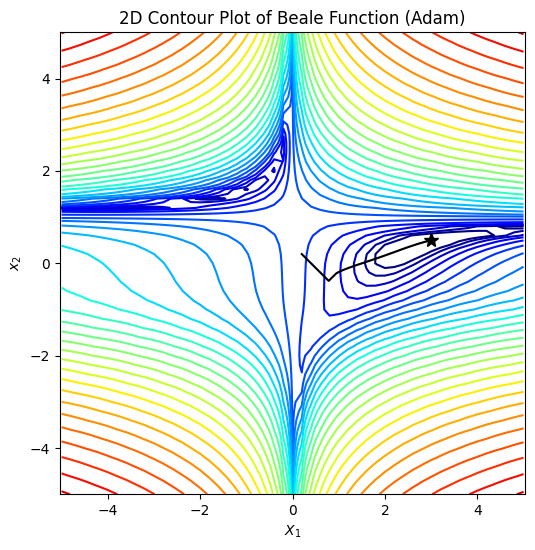

In [13]:
x_traj = [(step_x1, step_x2)]
v = (0, 0)
m = (0, 0)

for _ in range(10000):
    x_traj, m, v = Adam(
        x_traj=x_traj, lr=0.001, beta1=0.9, beta2=0.99, epsilon=1e-8, m=m, v=v
    )
print(x_traj[-1])
gd_plot(x_traj, "Adam")
plt.show()